In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import xgboost
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


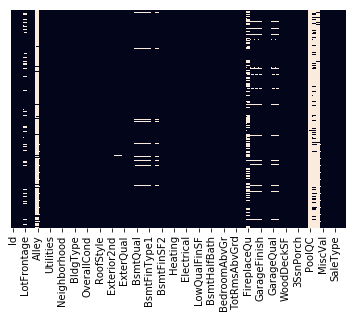

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [5]:
train.shape

(1460, 81)

In [6]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [12]:
missing_value = pd.DataFrame(train.dtypes)
missing_value.rename(columns = {0:'DataTypes'},inplace=True)
missing_value['Null Value'] = train.isnull().sum()
missing_value['Percentage Missing Values'] = train.isna().mean().round(2)*100
missing_value['Count'] = train.count()

In [25]:
missing_value

,DataTypes,Null Value,Percentage Missing Values,Count
Id,int64,0,0.0,1460
MSSubClass,int64,0,0.0,1460
MSZoning,object,0,0.0,1460
LotFrontage,float64,0,0.0,1460
LotArea,int64,0,0.0,1460
Street,object,0,0.0,1460
LotShape,object,0,0.0,1460
LandContour,object,0,0.0,1460
Utilities,object,0,0.0,1460
LotConfig,object,0,0.0,1460


In [8]:
#Filling Missing Values
train["LotFrontage"] = train["LotFrontage"].fillna(train["LotFrontage"].mean())
train["MasVnrType"] = train["MasVnrType"].fillna(train["MasVnrType"].mode()[0])
train["MasVnrArea"] = train["MasVnrArea"].fillna(train["MasVnrArea"].mean())
train["BsmtQual"] = train["BsmtQual"].fillna(train["BsmtQual"].mode()[0])
train["BsmtCond"] = train["BsmtCond"].fillna(train["BsmtCond"].mode()[0])
train["BsmtExposure"] = train["BsmtExposure"].fillna(train["BsmtExposure"].mode()[0])
train["BsmtFinType1"] = train["BsmtFinType1"].fillna(train["BsmtFinType1"].mode()[0])
train["BsmtFinType2"] = train["BsmtFinType2"].fillna(train["BsmtFinType2"].mode()[0])
train["Electrical"] = train["Electrical"].fillna(train["Electrical"].mode()[0])
train["FireplaceQu"] = train["FireplaceQu"].fillna(train["FireplaceQu"].mode()[0])
train["GarageType"] = train["GarageType"].fillna(train["GarageType"].mode()[0])
train["GarageFinish"] = train["GarageFinish"].fillna(train["GarageFinish"].mode()[0])
train["GarageQual"] = train["GarageQual"].fillna(train["GarageQual"].mode()[0])
train["GarageCond"] = train["GarageCond"].fillna(train["GarageCond"].mode()[0])
train.drop(["GarageYrBlt","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)
train.drop(["Alley"],axis=1,inplace=True)

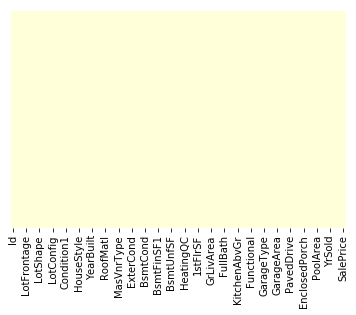

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

In [17]:
train.drop(['Id'],axis=1,inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [19]:
train.shape

(1460, 75)

In [20]:
test = pd.read_csv("Cleaned_test.csv")

In [21]:
test.shape

(1459, 75)

In [22]:
df = pd.concat([train,test],axis=0)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [23]:
df.shape

(2919, 76)

In [28]:
df.select_dtypes(include='object').columns

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning',
       'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [29]:
columns=['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning',
       'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities']

In [30]:
len(columns)

39

In [34]:
cate = pd.DataFrame(df.select_dtypes(include='object').nunique())

In [35]:
cate

,0
BldgType,5
BsmtCond,4
BsmtExposure,4
BsmtFinType1,6
BsmtFinType2,6
BsmtQual,4
CentralAir,2
Condition1,9
Condition2,8
Electrical,5


In [38]:
def one_hot_encode(col):
    final_df = df
    i=0
    for fields in col:
        
        print(fields)
        df1=pd.get_dummies(df[fields],drop_first=True)
        df.drop([fields],axis=1,inplace=True)
        
        if i==0:
            final_df = df1.copy()
        else:
            final_df=pd.concat([final_df,df1],axis=1)
            
        i = i+1
    final_df = pd.concat([df,final_df],axis=1)
    return final_df

In [39]:
df = one_hot_encode(columns)

BldgType
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
BsmtQual
CentralAir
Condition1
Condition2
Electrical
ExterCond
ExterQual
Exterior1st
Exterior2nd
FireplaceQu
Foundation
Functional
GarageCond
GarageFinish
GarageQual
GarageType
Heating
HeatingQC
HouseStyle
KitchenQual
LandContour
LandSlope
LotConfig
LotShape
MSZoning
MasVnrType
Neighborhood
PavedDrive
RoofMatl
RoofStyle
SaleCondition
SaleType
Street
Utilities


In [40]:
df.shape

(2919, 237)

In [41]:
df = df.loc[:,~df.columns.duplicated()]

In [42]:
df.shape

(2919, 177)

In [52]:
df.drop(["Id"],axis=1,inplace=True)

In [53]:
Train = df.iloc[:1460,:]
Test = df.iloc[1459:,:]

In [56]:
Train.shape,Test.shape

((1460, 176), (1460, 175))

In [55]:
Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [59]:
x_train = Train.drop(["SalePrice"],axis=1)
y_train = Train["SalePrice"]

In [60]:
x_train.shape,y_train.shape

((1460, 175), (1460,))

In [79]:
XGB= xgboost.XGBRegressor()

In [80]:
booster = ['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100,500,900,1100,1500]
max_depth = [2,3,5,10,15]
learning_rate = [0.05,0.1,0.15,0.20]

hyperparameter_grid={
    'n_estimators' : n_estimators,
    'booster': booster,
    'base_score' : base_score,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate
}

In [82]:
random_CV = RandomizedSearchCV(estimator=XGB,param_distributions=hyperparameter_grid,cv=5,n_iter=50,scoring='neg_mean_absolute_error',n_jobs=4,return_train_score=True,random_state=44)

In [83]:
random_CV.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:03:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'n_estimators': [100, 500, 900, 1100, 1500], 'booster': ['gbtree', 'gblinear'], 'base_score': [0.25, 0.5, 0.75, 1], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2]},
          pre_dispatch='2*n_jobs', random_state=44, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=0)

In [84]:
random_CV.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=1100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [85]:
XGB = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=1100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
XGB.fit(x_train,y_train)
y_pred = XGB.predict(Test)

C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:05:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [86]:
y_pred

array([141119.53 , 116035.836, 163960.22 , ..., 172992.3  , 122907.44 ,
       237671.16 ], dtype=float32)

In [87]:
pred = pd.DataFrame(y_pred)
sub = pd.read_csv('sample_submission.csv')
dataset = pd.concat([sub['Id'],pred],axis=1)
dataset.columns = ["Id","SalePrice"]
dataset.to_csv('SubmissionXGHP.csv',index=False)